In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

data = pd.read_csv('/Users/vlad/data_management/jupyter_notebooks/data/non_linear.csv', sep=',')
data.head()

degree = 6
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model = Ridge(alpha=0).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))


Качество на валидации: 0.067
Качество на обучении: 0.066


In [2]:
degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model = Ridge(alpha=0.01).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))

Качество на валидации: 0.070
Качество на обучении: 0.064


In [27]:
degree = 12
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model = Ridge(alpha=0.01).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))

Качество на валидации: 0.109
Качество на обучении: 0.062


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.48726e-20): result may not be accurate.
  overwrite_a=True).T


Качество на валидации Lasso: 0.147
Качество на обучении Lasso: 0.104
Качество на валидации Ridge: 0.077
Качество на обучении Ridge: 0.073


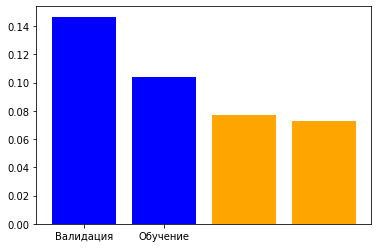

In [23]:
degree = 6
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model_lasso = Lasso(alpha=0.8).fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_valid)
y_pred_train_lasso = model_lasso.predict(X_train)
print("Качество на валидации Lasso: %.3f" % mean_squared_error(y_valid, y_pred_lasso))
print("Качество на обучении Lasso: %.3f" % mean_squared_error(y_train, y_pred_train_lasso))

model_ridge = Ridge(alpha=0.8).fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_valid)
y_pred_train_ridge = model_ridge.predict(X_train)
print("Качество на валидации Ridge: %.3f" % mean_squared_error(y_valid, y_pred_ridge))
print("Качество на обучении Ridge: %.3f" % mean_squared_error(y_train, y_pred_train_ridge))


together1 = [mean_squared_error(y_valid, y_pred_lasso), mean_squared_error(y_train, y_pred_train_lasso)]
together2 = [mean_squared_error(y_valid, y_pred_ridge), mean_squared_error(y_train, y_pred_train_ridge)]

import numpy as np

objects = ('Валидация', 'Обучение')
y_pos = np.arange(len(objects))

import matplotlib.pyplot as plt
plt.bar(y_pos, together1, align='center', color = 'blue')
plt.bar(y_pos+2, together2, align='center', color = 'orange')
plt.xticks(y_pos, objects)
plt.show()

In [5]:
W = np.linalg.inv(X.transpose() @ X + np.ones(8))@X.transpose()*y

Итарации остановлены на шаге 191


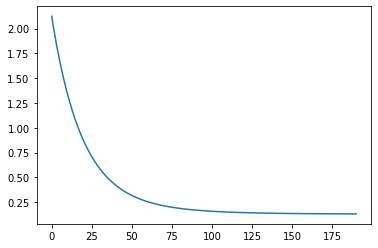

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# для регрессии
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance
%matplotlib inline

data = pd.read_csv('/Users/vlad/data_management/jupyter_notebooks/data/non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()

X = data['x_train'].values.reshape(-1, 1) # превращаем X из простого массива в вектор-столбец
y = data['y_train'].values

# разбиваем на трейн и валидацию
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

data.head()

sgd_regressor = SGDRegressor(learning_rate='constant', eta0=0.01, fit_intercept=True, random_state=42)
w_current, epsilon = np.random.random(2), 0.0001
weight_evolution, rmse_evolution = [], [] # изменения весов и ошибка на валидации
for step in list(range(800)):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
    weight_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_))
    if weight_evolution[-1]<epsilon:
        print("Итарации остановлены на шаге %d" % step); break
    rmse_evolution.append(mean_squared_error(y_valid, sgd_regressor.predict(X_valid)))
    w_current = sgd_regressor.coef_.copy()
plt.plot(range(step), rmse_evolution)

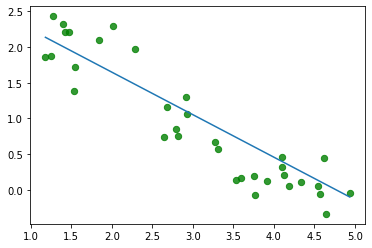

In [13]:
x_linspace = np.linspace(data['x_train'].min(), data['x_train'].max(), num=1000)

y_linspace= sgd_regressor.predict(x_linspace.reshape(-1,1))

plt.plot(x_linspace, y_linspace)
plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8, label='data')

plt.show()

Итарации остановлены на шаге 191


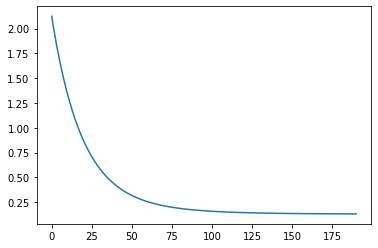

In [14]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
X = boston_dataset.data
y = boston_dataset.target
X = data['x_train'].values.reshape(-1, 1) # превращаем X из простого массива в вектор-столбец
y = data['y_train'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

sgd_regressor = SGDRegressor(learning_rate='constant', eta0=0.01, fit_intercept=True, random_state=42)
w_current, epsilon = np.random.random(2), 0.0001
weight_evolution, rmse_evolution = [], [] # изменения весов и ошибка на валидации
for step in list(range(800)):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
    weight_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_))
    if weight_evolution[-1]<epsilon:
        print("Итарации остановлены на шаге %d" % step); break
    rmse_evolution.append(mean_squared_error(y_valid, sgd_regressor.predict(X_valid)))
    w_current = sgd_regressor.coef_.copy()
plt.plot(range(step), rmse_evolution)

In [9]:
import numpy as np
import pandas as pd

data = pd.read_csv('/Users/vlad/data_management/jupyter_notebooks/data/non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()
data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


In [10]:
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gradient(X, y, w, alpha=0) -> np.array:
    # количество обучающих примеров в выборке
    n = X.shape[0]
    # считаем прогноз
    y_hat = X.dot(w.T)
    # вычисляем ошибку прогноза
    error = y - y_hat
    # дальше pointwise перемножение - умножаем каждую из координат на ошибку
    pointwise_errors = np.multiply(X, error) + X
    # print(pointwise_errors.shape, X.shape, error.shape)
    grad = pointwise_errors.sum(axis=0)*(-1.0)*2.0 / n
    return grad, error

def eval_w_next(X, y, eta, w_current):
    # вычисляем градиент
    grad, error = gradient(X, y, w_current)
    # делаем шаг градиентного спуска
    w_next = w_current - eta*grad
    # проверяем условие сходимости
    weight_evolution = distance.euclidean(w_current, w_next)
    return (w_next, weight_evolution, grad)

def gradient_descent(X: np.array, y: np.array, eta=0.01, epsilon=0.001) -> np.array:
    m = X.shape[1] # количество фичей
    # инициализируем рандомом веса
    w = np.random.random(m).reshape(1, -1)
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
    step = 0
    # повторяем до сходимости вектора весов
    while weight_evolution > epsilon:
        w = w_next
        w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
        step += 1
        if step % 100 ==0:
            print("step %s |w-w_next|=%.5f, grad=%s" % (step, weight_evolution, grad))
    return w

# трансформируем плоский массив X в вектор-столбец
X = data['x_train'].values.reshape(-1, 1)
n = X.shape[0]
# добавляем тривиальный признак w_0, столбец из единиц. См. прошлый урок, почему так
X = np.hstack([
    np.ones(n).reshape(-1,1),
    X
])
w = gradient_descent(X, data['y_train'].values.reshape(-1, 1), eta=0.008)

step 100 |w-w_next|=0.00521, grad=[-0.62596927  0.18083007]
step 200 |w-w_next|=0.00429, grad=[-0.51512626  0.14880973]
step 300 |w-w_next|=0.00353, grad=[-0.42391069  0.12245937]
step 400 |w-w_next|=0.00290, grad=[-0.34884705  0.10077497]
step 500 |w-w_next|=0.00239, grad=[-0.28707524  0.08293033]
step 600 |w-w_next|=0.00197, grad=[-0.23624162  0.06824551]
step 700 |w-w_next|=0.00162, grad=[-0.19440933  0.05616099]
step 800 |w-w_next|=0.00133, grad=[-0.15998445  0.04621633]
step 900 |w-w_next|=0.00110, grad=[-0.13165533  0.03803261]
